In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

intel_file = './results/results.csv'
results_file = './results/jetson/results.csv'
df = pd.read_csv(results_file)
df_intel = pd.read_csv(intel_file)
# df_intel = df_intel[df_intel['index_size'] == 10000]

df['throughput'] = df['query_size'] / df['latency_(s)']
df_intel['throughput'] = df_intel['query_size'] / df_intel['latency_(s)']

# diff = df['latency_(s)'] - df_intel['latency_(s)']
# diff.mean()
# df[df['index_type'] == 'spann'].head()

In [40]:
Q1 = df['latency_(s)'].quantile(0.25)
Q3 = df['latency_(s)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['latency_(s)'] >= lower_bound) & (df['latency_(s)'] <= upper_bound)]

Q1 = df_intel['latency_(s)'].quantile(0.25)
Q3 = df_intel['latency_(s)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_intel = df_intel[(df_intel['latency_(s)'] >= lower_bound) & (df_intel['latency_(s)'] <= upper_bound)]

In [41]:
df.describe()

,cpu_core_count,total_DRAM_(GB),storage_read_count,storage_write_count,storage_read_bytes,storage_write_bytes,RAM_Used_MB,RAM_Total_MB,SWAP_Used_MB,SWAP_Total_MB,...,dims,index_size,k,query_size,peak_dram_(MB),peak_WSS_(MB),latency_(s),recall1,recall2,throughput
count,3047.0,3.047000e+03,3.047000e+03,3047.000000,3.047000e+03,3.047000e+03,3047.000000,3047.0,3047.000000,3047.0,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,4.0,1.925926e+00,1.495310e+07,42339.738431,4.573491e+11,2.230670e+10,1279.062479,1972.0,50.631997,986.0,...,342.222514,44981.949458,40.262882,2978.326223,212.356987,236.202333,11.023627,0.925365,0.960053,640.226755
std,0.0,2.107788e-10,1.218935e+07,38839.873001,4.534150e+11,6.650181e+10,257.055880,0.0,86.525232,0.0,...,278.498274,39370.347935,39.123986,3453.544463,89.003750,105.647376,14.977983,0.078865,0.054484,1101.467678
min,4.0,1.925926e+00,1.715000e+04,1201.000000,9.879644e+08,2.857779e+07,809.700000,1972.0,0.000000,986.0,...,64.000000,10000.000000,1.000000,10.000000,102.160156,102.160156,0.081256,0.615688,0.700000,0.664987
25%,4.0,1.925926e+00,4.688277e+06,14232.500000,8.842048e+10,2.989957e+08,1053.884463,1972.0,0.000000,986.0,...,128.000000,10000.000000,10.000000,80.000000,146.865234,148.171875,1.026919,0.894870,0.950000,39.395268
50%,4.0,1.925926e+00,1.172050e+07,37892.000000,2.317930e+11,5.012398e+08,1241.060477,1972.0,14.276299,986.0,...,256.000000,25000.000000,50.000000,1280.000000,186.183594,196.953125,2.981656,0.953750,0.982812,173.479357
75%,4.0,1.925926e+00,2.580678e+07,50759.500000,8.868950e+11,7.416463e+08,1503.139947,1972.0,81.000000,986.0,...,512.000000,100000.000000,75.000000,6400.000000,240.607422,305.238281,20.389617,0.981250,0.997000,561.323772
max,4.0,1.925926e+00,4.035998e+07,199775.000000,1.570823e+12,2.250971e+11,1708.564441,1972.0,460.974026,986.0,...,960.000000,100000.000000,100.000000,10000.000000,527.863281,527.863281,60.888909,1.000000,1.000000,6444.348160


# Latency

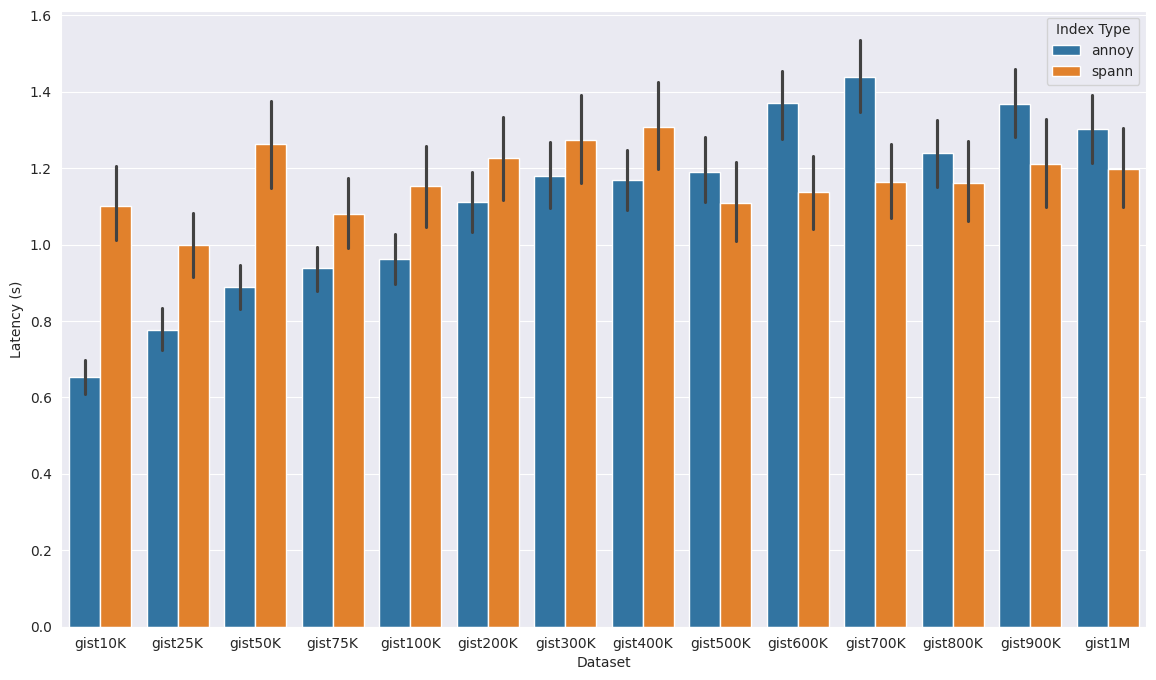

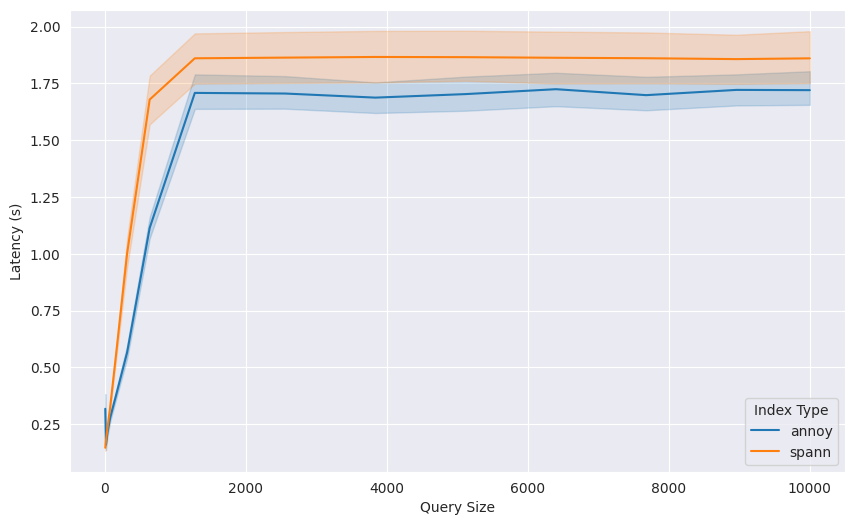

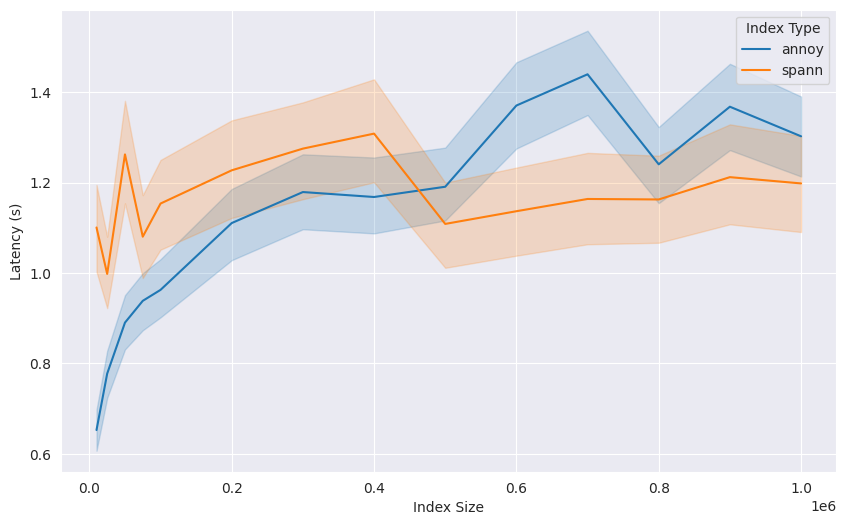

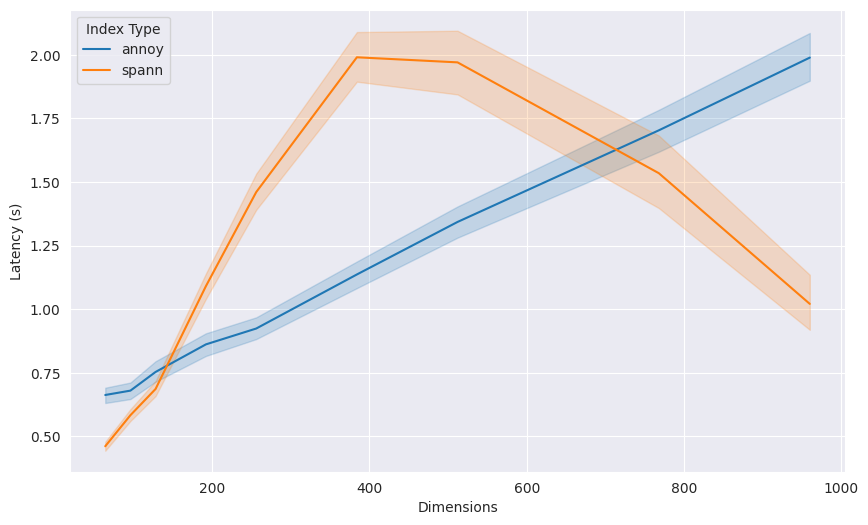

In [42]:
# Latency Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df_intel, x='dataset', y='latency_(s)', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_distribution.png')
plt.show()

# Latency vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='latency_(s)', hue='index_type', data=df_intel)
plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_query_size.png')
plt.show()

# Latency vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='latency_(s)', hue='index_type', data=df_intel)
plt.xlabel('Index Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_index_size.png')
plt.show()

# Latency vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='latency_(s)', hue='index_type', data=df_intel)
plt.xlabel('Dimensions')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_dims.png')
plt.show()

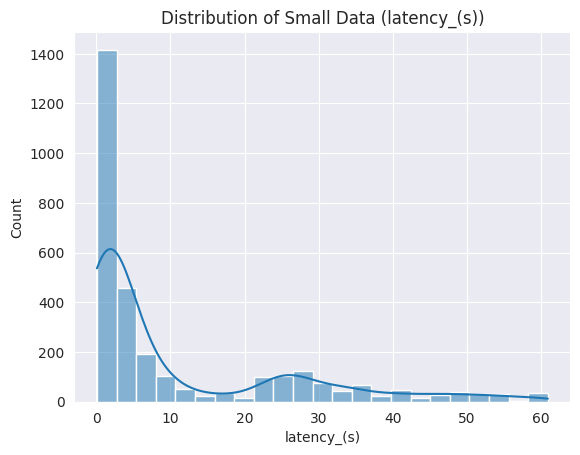

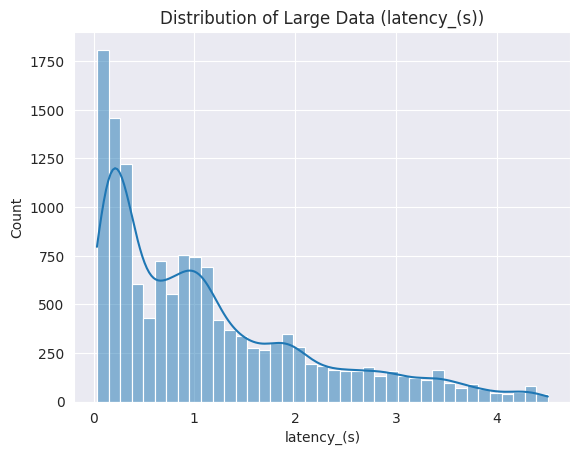

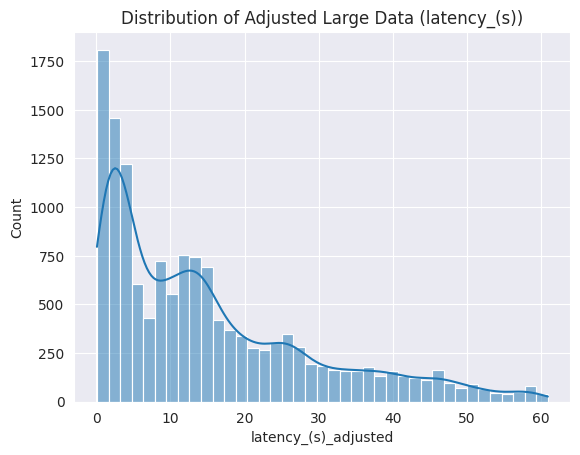

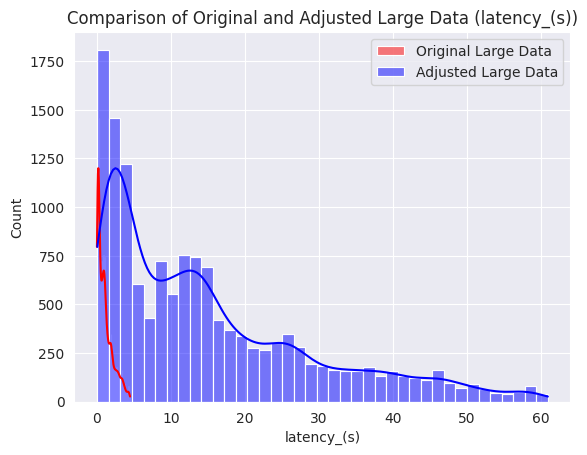

In [43]:
# Generate example data (simulating real data for illustration)
np.random.seed(42)

# Analyze distribution of the smaller dataset
sns.histplot(df['latency_(s)'], kde=True)
plt.title('Distribution of Small Data (latency_(s))')
plt.show()

# Analyze distribution of the larger dataset
sns.histplot(df_intel['latency_(s)'], kde=True)
plt.title('Distribution of Large Data (latency_(s))')
plt.show()

# Fit MinMaxScaler on the small dataset
scaler = MinMaxScaler(feature_range=(df['latency_(s)'].min(), df['latency_(s)'].max()))

# Transform the large dataset using the scaler fitted on the small dataset
df_intel['latency_(s)_adjusted'] = scaler.fit_transform(df_intel[['latency_(s)']])

# Analyze the adjusted large dataset
sns.histplot(df_intel['latency_(s)_adjusted'], kde=True)
plt.title('Distribution of Adjusted Large Data (latency_(s))')
plt.show()

# Compare before and after adjustment
sns.histplot(df_intel['latency_(s)'], kde=True, color='red', label='Original Large Data')
sns.histplot(df_intel['latency_(s)_adjusted'], kde=True, color='blue', label='Adjusted Large Data')
plt.title('Comparison of Original and Adjusted Large Data (latency_(s))')
plt.legend()
plt.show()

df_intel['latency_(s)'] = df_intel['latency_(s)_adjusted']

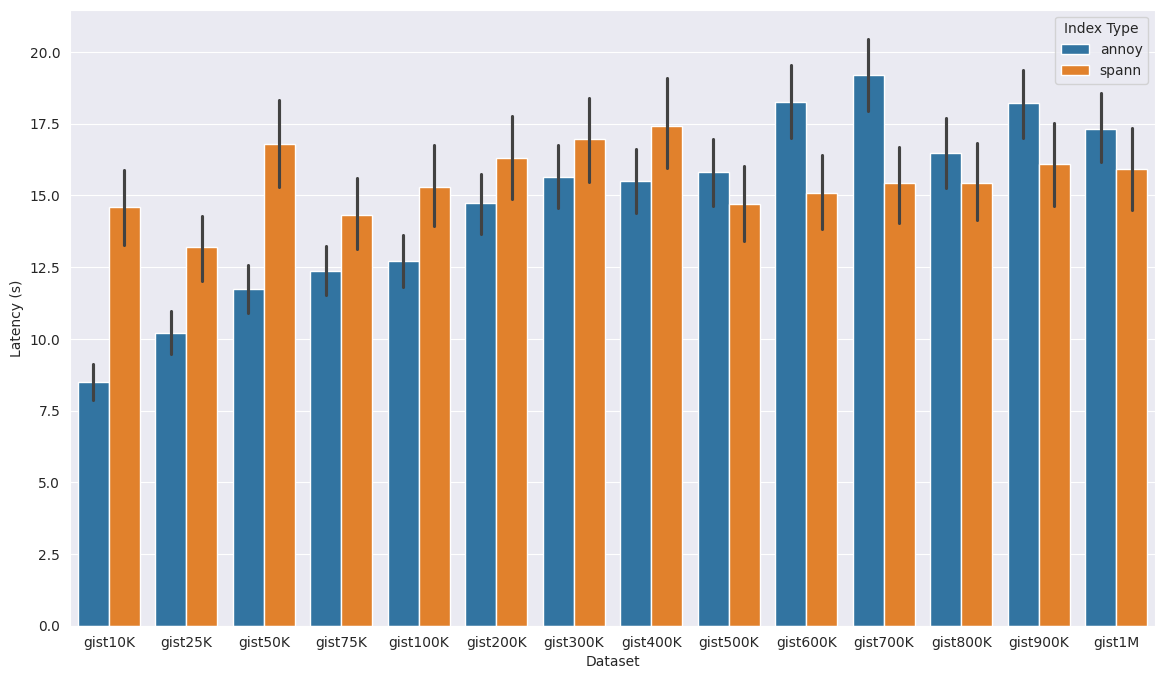

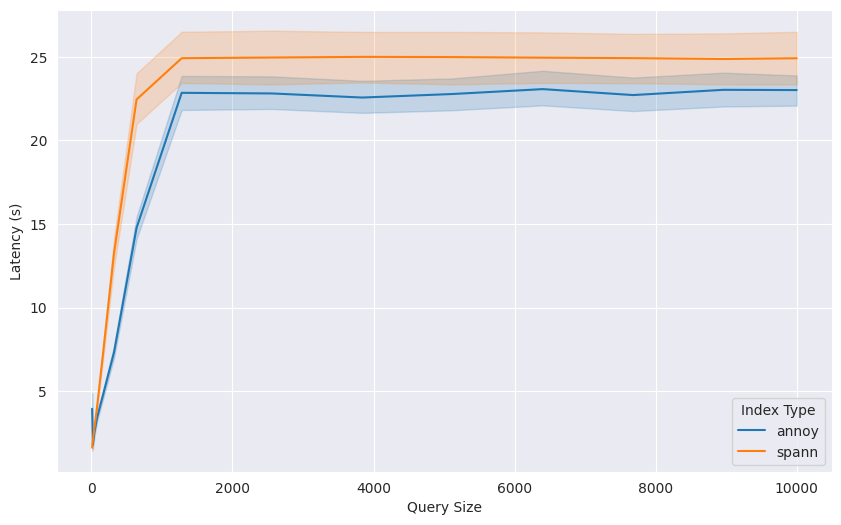

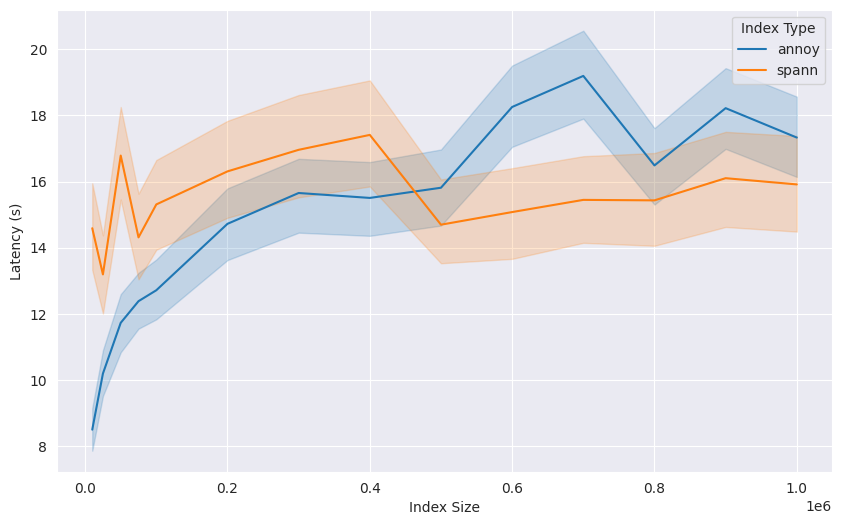

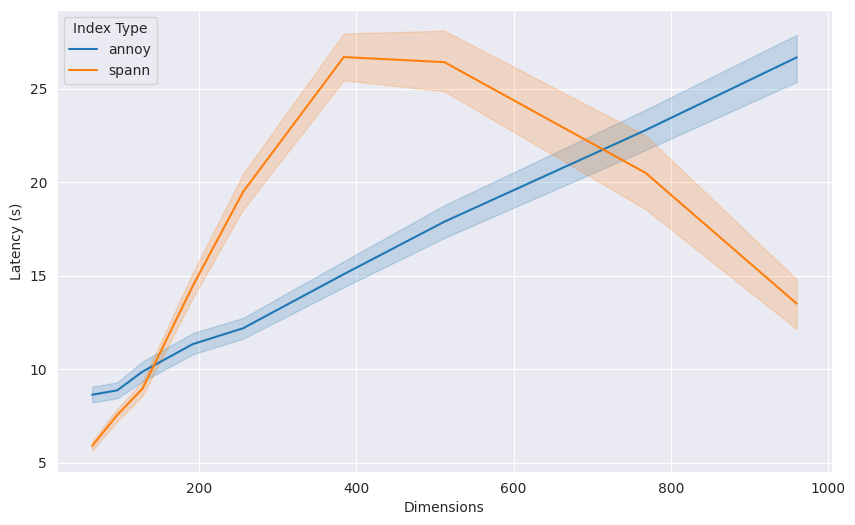

In [44]:
# Latency Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df_intel, x='dataset', y='latency_(s)', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_distribution.png')
plt.show()

# Latency vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='latency_(s)', hue='index_type', data=df_intel)
plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_query_size.png')
plt.show()

# Latency vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='latency_(s)', hue='index_type', data=df_intel)
plt.xlabel('Index Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_index_size.png')
plt.show()

# Latency vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='latency_(s)', hue='index_type', data=df_intel)
plt.xlabel('Dimensions')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_dims.png')
plt.show()

# Throughput

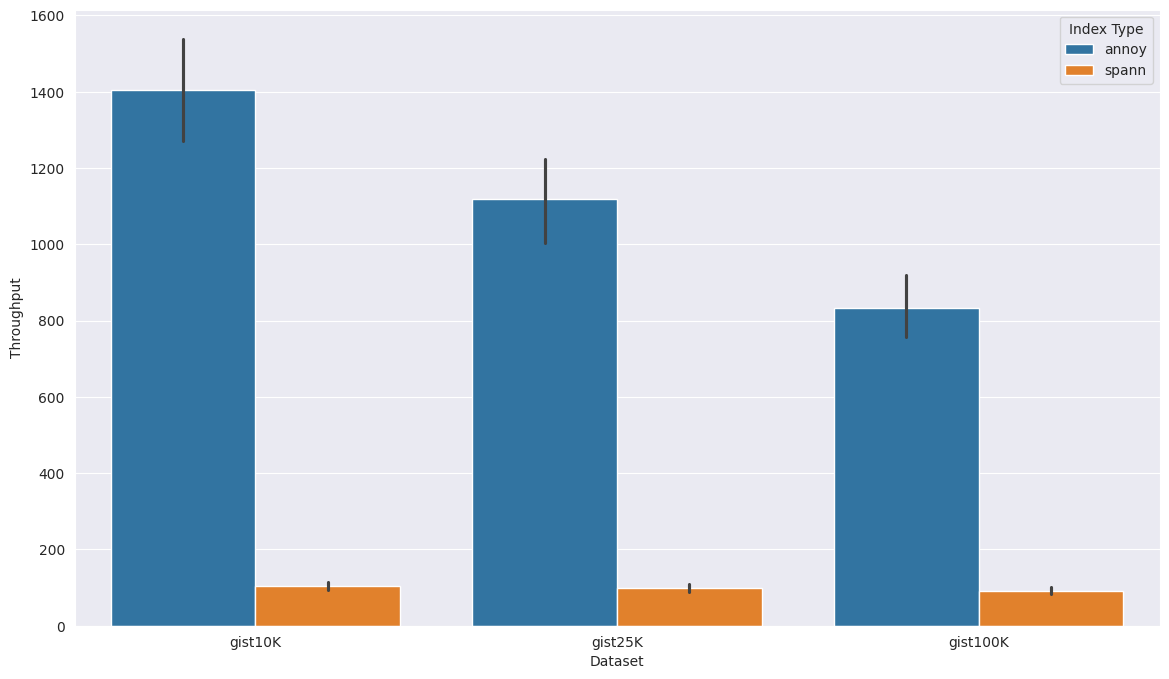

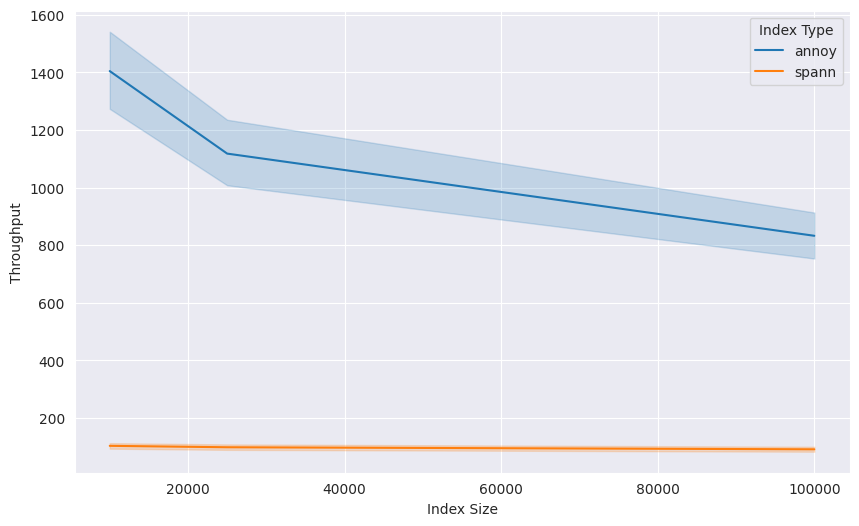

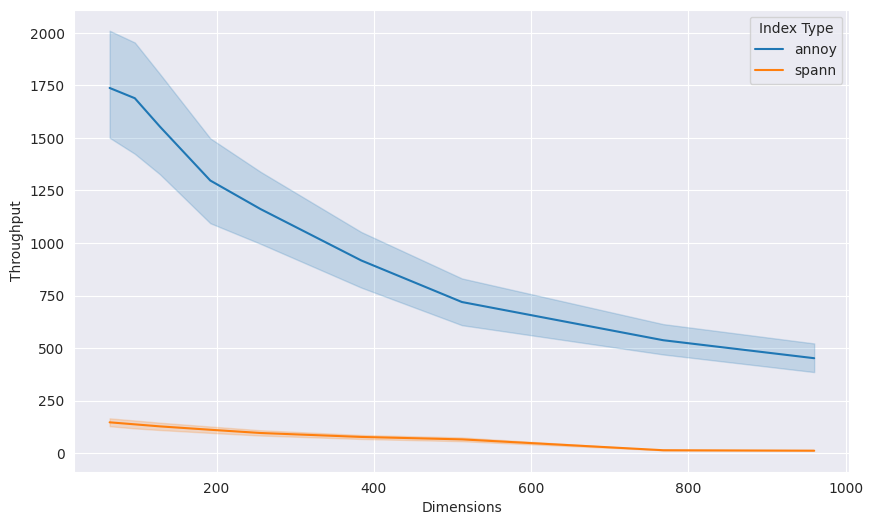

In [45]:
# Latency Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='throughput', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_distribution.png')
plt.show()

# # Throughout vs Query Size
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='query_size', y='throughput', hue='index_type', data=df)
# plt.xlabel('Query Size')
# plt.ylabel('Throughput')
# plt.legend(title='Index Type')
# plt.savefig('./figures/throughput_vs_query_size.png')
# plt.show()

# Throughout vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='throughput', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_vs_index_size.png')
plt.show()

# Throughout vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='throughput', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_vs_dims.png')
plt.show()

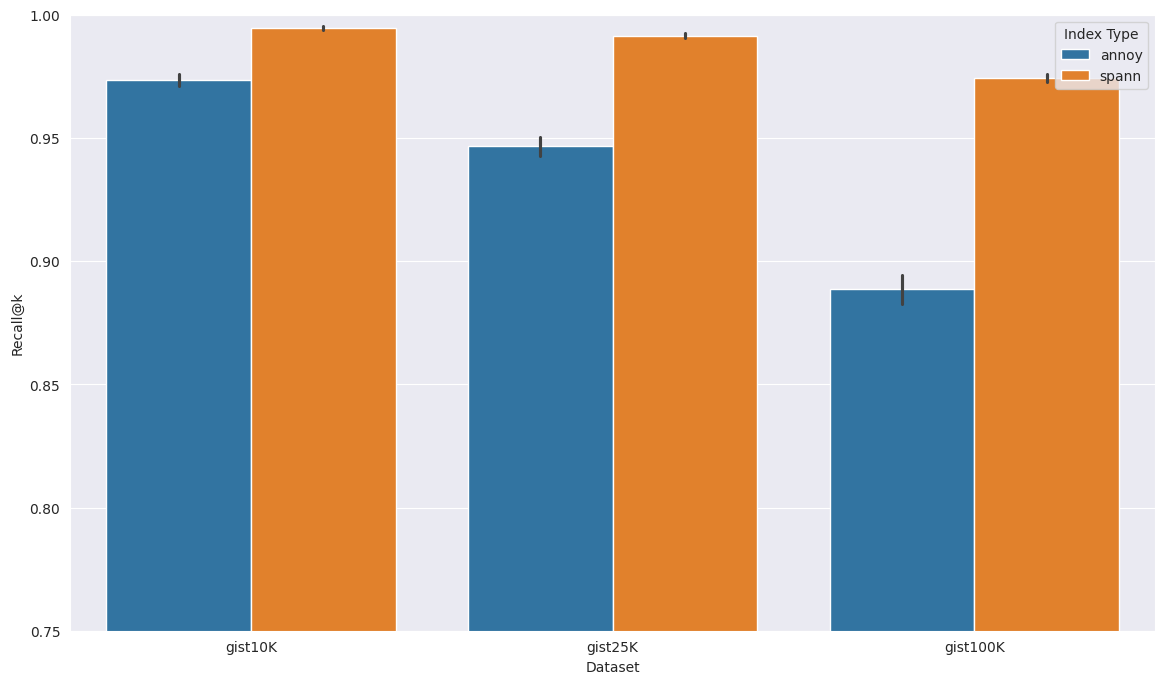

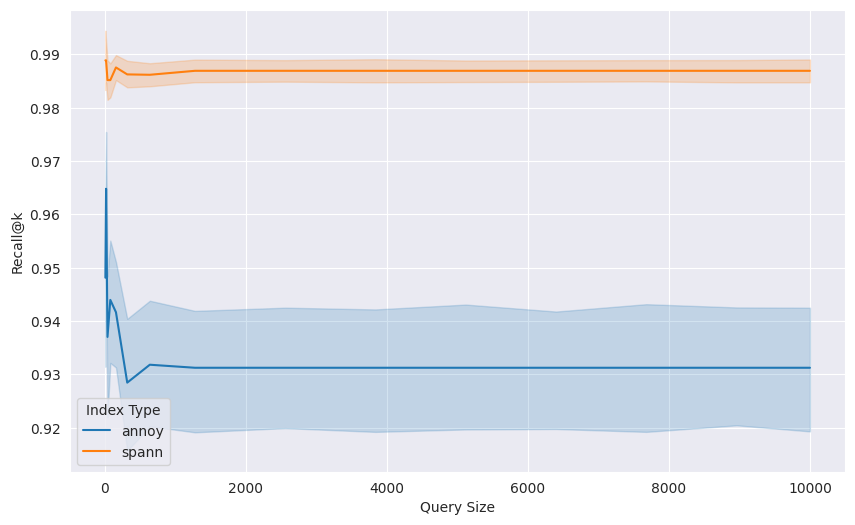

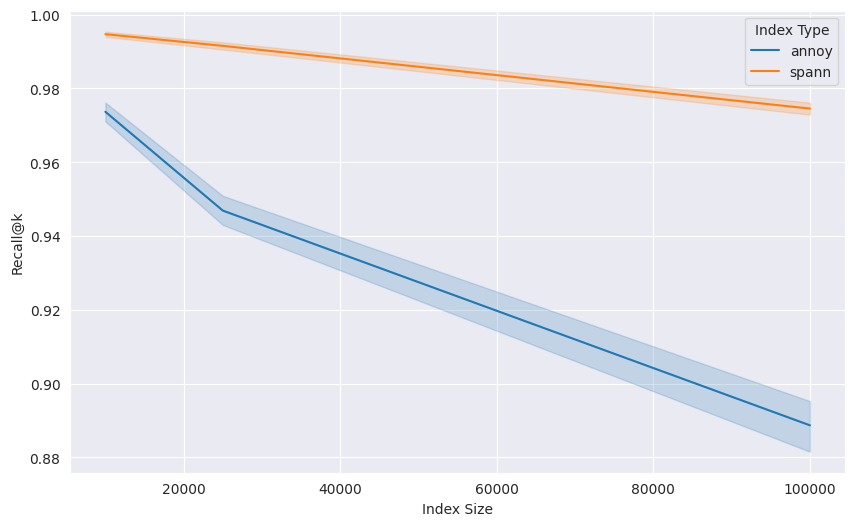

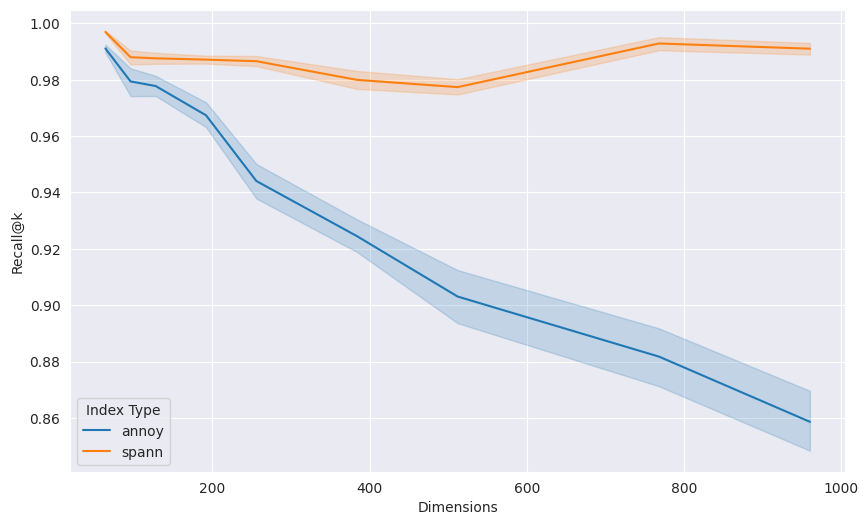

In [46]:
# Recall Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='recall2', hue='index_type')
plt.ylim([0.75, 1.0])
plt.xlabel('Dataset')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_distribution.png')
plt.show()

# Recall vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='recall2', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_query_size.png')
plt.show()

# Recall vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='recall2', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_index_size.png')
plt.show()

# Recall vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='recall2', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_dims.png')
plt.show()

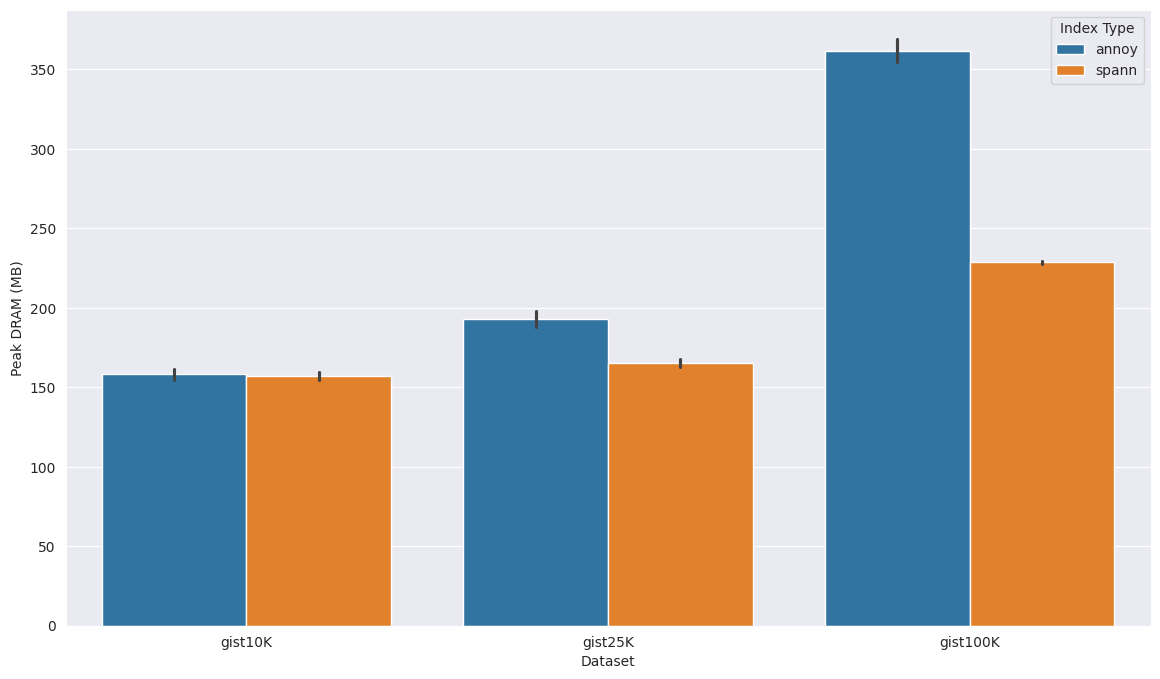

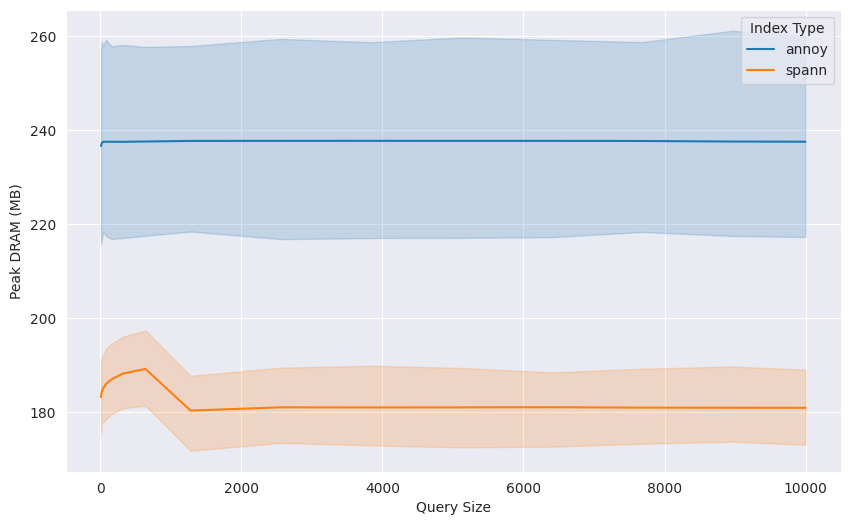

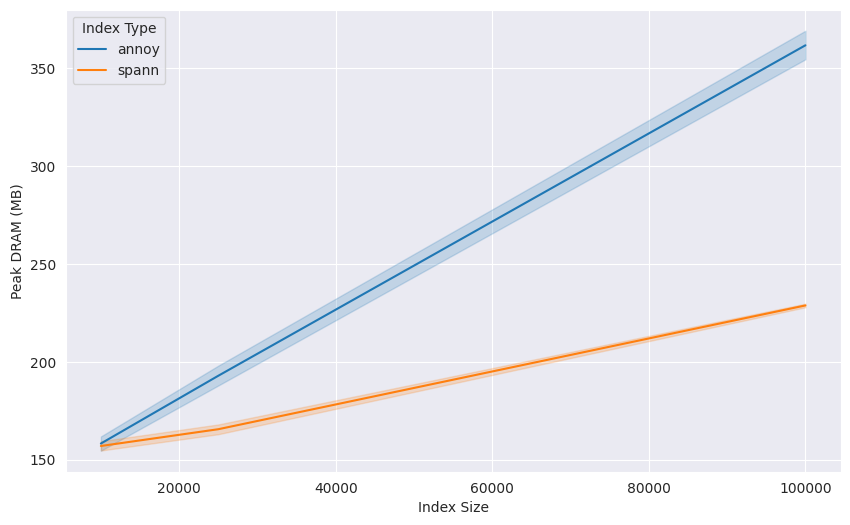

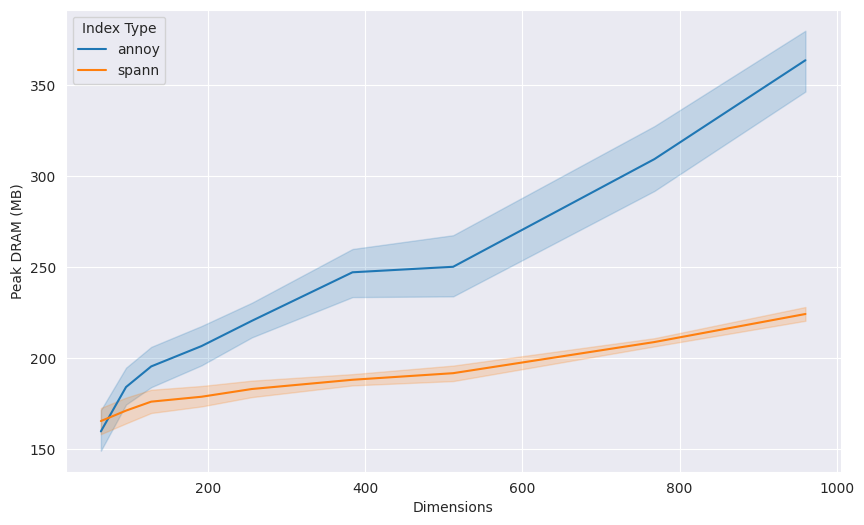

In [47]:
# DRAM Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='peak_dram_(MB)', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_distribution.png')
plt.show()

# DRAM vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_query_size.png')
plt.show()

# DRAM vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_index_size.png')
plt.show()

# DRAM vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_dims.png')
plt.show()

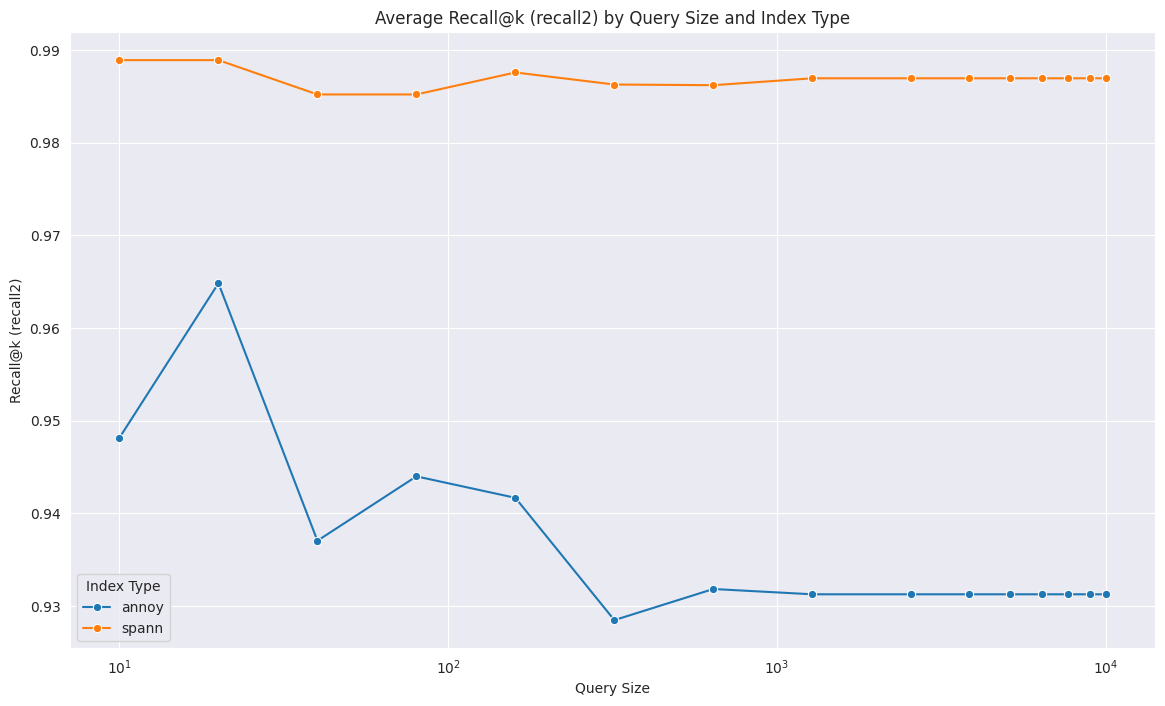

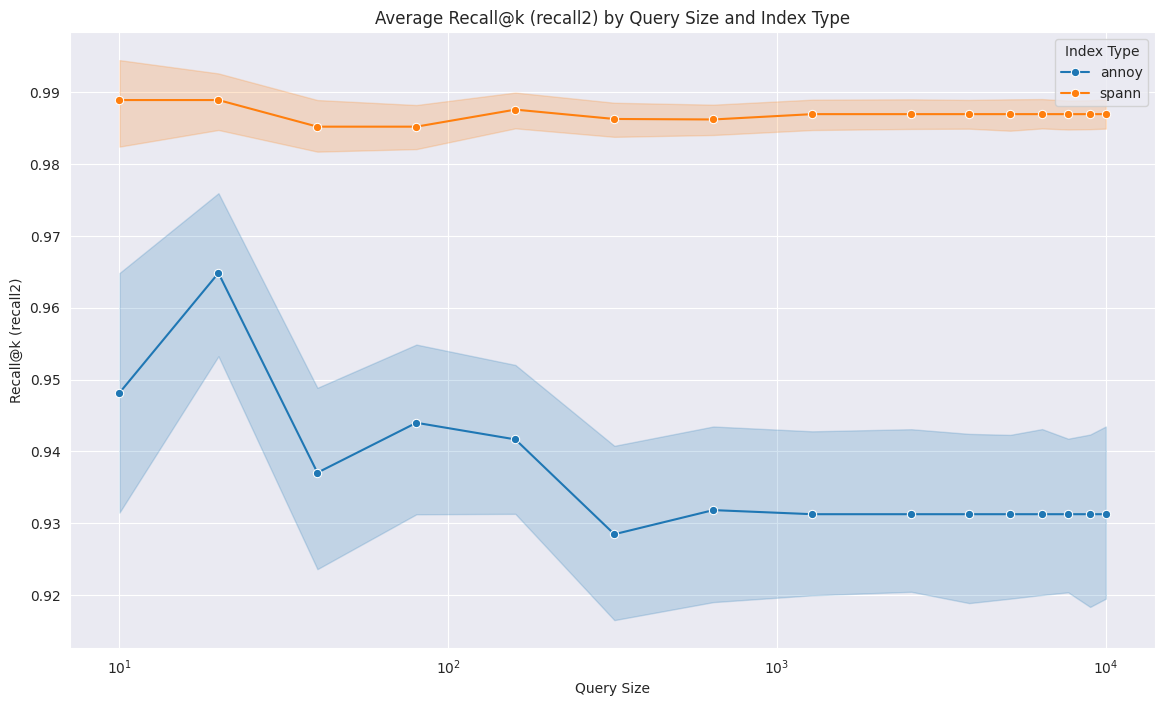

In [48]:
# Average recall by query size and index type
recall_avg = df.groupby(['query_size', 'index_type'])['recall2'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=recall_avg, x='query_size', y='recall2', hue='index_type', marker='o')
plt.title('Average Recall@k (recall2) by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Recall@k (recall2)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='query_size', y='recall2', hue='index_type', marker='o')
plt.title('Average Recall@k (recall2) by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Recall@k (recall2)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

In [49]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# 
# # Load the data
# csv_file_path = './results/results.csv'  # Adjust this path to where your CSV file is located
# df = pd.read_csv(csv_file_path)
# 
# # Select only the relevant columns
# df = df[['latency_(s)', 'recall2', 'peak_dram_(MB)', 'index_type', 'query_size', 'k', 'dims', 'index_size']]
# 
# # Convert categorical variables to dummy variables
# df = pd.get_dummies(df, columns=['index_type'], drop_first=True)
# 
# # Define the target variable (performance metric to predict, e.g., 'latency_(s)')
# target_variable = 'latency_(s)'
# 
# # Define the features (all other columns except the target)
# features = df.drop(columns=[target_variable])
# 
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.2, random_state=42)
# 
# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# 
# # Train a regression model
# regressor = LinearRegression()
# regressor.fit(X_train_scaled, y_train)
# 
# # Make predictions
# y_train_pred = regressor.predict(X_train_scaled)
# y_test_pred = regressor.predict(X_test_scaled)
# 
# # Evaluate the model
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# r2 = r2_score(y_test, y_test_pred)
# 
# print(f'Training RMSE: {train_rmse}')
# print(f'Test RMSE: {test_rmse}')
# print(f'R^2 Score: {r2}')
# 
# # Plot predictions vs actual values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, alpha=0.7)
# plt.xlabel('Actual Latency (s)')
# plt.ylabel('Predicted Latency (s)')
# plt.title('Actual vs Predicted Latency')
# plt.show()

In [50]:
df_intel['latency_(s)_adjusted'].max()

60.88890886306763

In [51]:
df_intel['latency_(s)'].max()

60.88890886306763

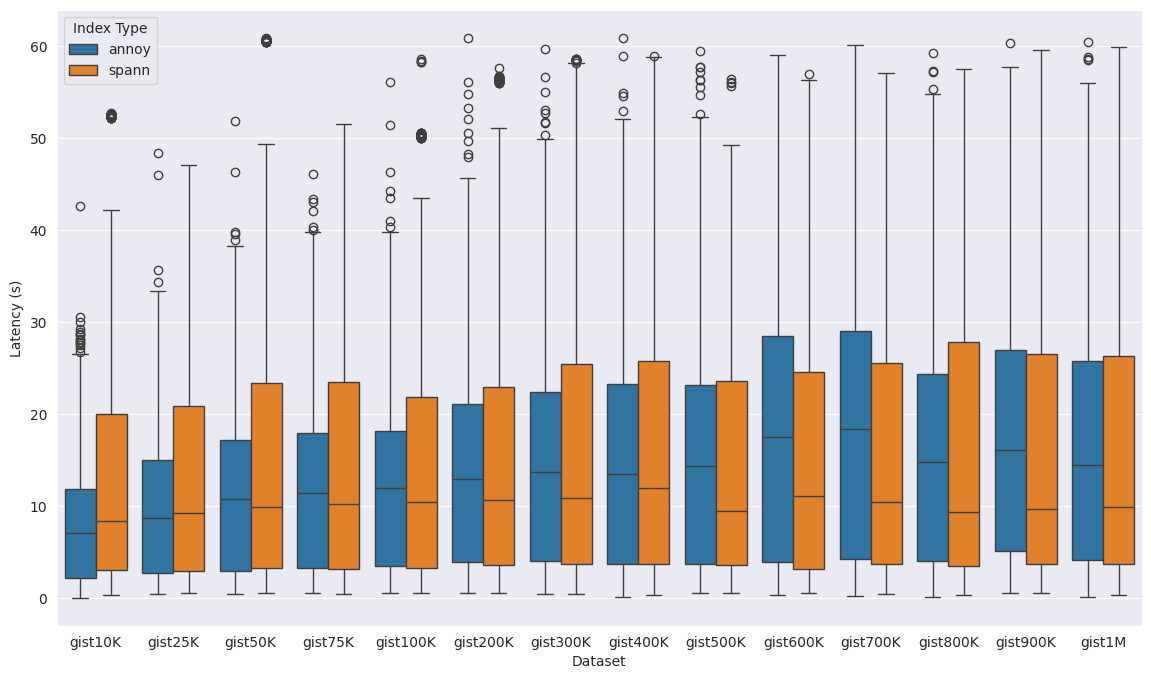

In [52]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_intel, x='dataset', y='latency_(s)_adjusted', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_distribution.png')
plt.show()